In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x = df.iloc[:,[3,4]].values

## Find The Cluster Numbers

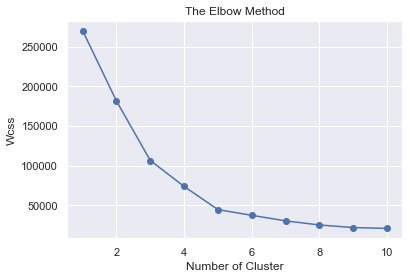

In [4]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init= 10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Wcss')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init= 10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [6]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Applying The K-Means 

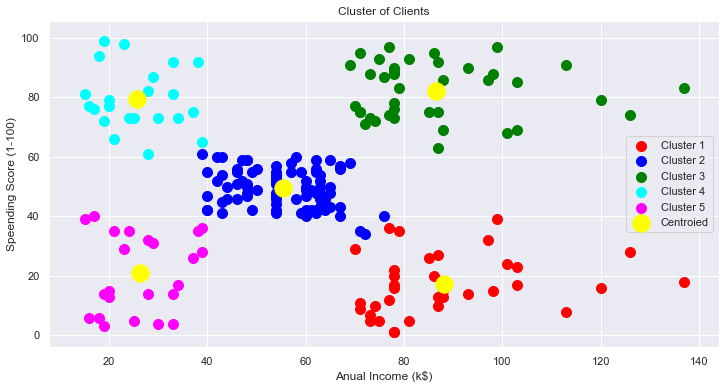

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(x[y_kmeans==0,0], x[y_kmeans== 0, 1], s=100,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans== 1, 1], s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans== 2, 1], s=100,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3, 1], s=100,c='cyan',label='Cluster 4')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans== 4, 1], s=100,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300,c='yellow',label='Centroied')
plt.title('Cluster of Clients')
plt.xlabel('Anual Income (k$)')
plt.ylabel('Speending Score (1-100)')
plt.legend()
plt.show()

## Observation
- Cluster 1 : High Income But Low Speending. So Its mentions Careful
- Cluster 2 : Average Income & Average speending. So Its mentions Standard
- Cluster 3 : High Income & High Speending. So Its mentions Target
- Cluster 4 : Low Income but High Speending. So Its mentions Careless
- Cluster 5 : Low Income & Low Speending. So Its mentions Sensible